In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'displayData.m', 'ex3.m', 'ex3data1.mat', 'ex3weights.mat', 'ex3_nn.m', 'fmincg.m', 'lib', 'lrCostFunction.m', 'MultiLabel Classification-2.ipynb', 'MultiLabel Classification.ipynb', 'Neural Network.ipynb', 'oneVsAll.m', 'predict.m', 'predictOneVsAll.m', 'sigmoid.m', 'submit.m']


In [3]:
from scipy.io import loadmat
from scipy.optimize import fmin_tnc

In [4]:
mat = loadmat('ex3weights.mat')
theta1 = mat['Theta1']
theta2 = mat['Theta2']


In [5]:
theta1.shape, theta2.shape

((25, 401), (10, 26))

In [6]:
images = loadmat('ex3data1.mat')['X']
labels = loadmat('ex3data1.mat')['y']

In [7]:
images.shape, labels.shape

((5000, 400), (5000, 1))

In [8]:
# np.unique(labels)
labels[labels==10] = 0

In [9]:
np.unique(labels)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

C:\Users\Fida Hussain\anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


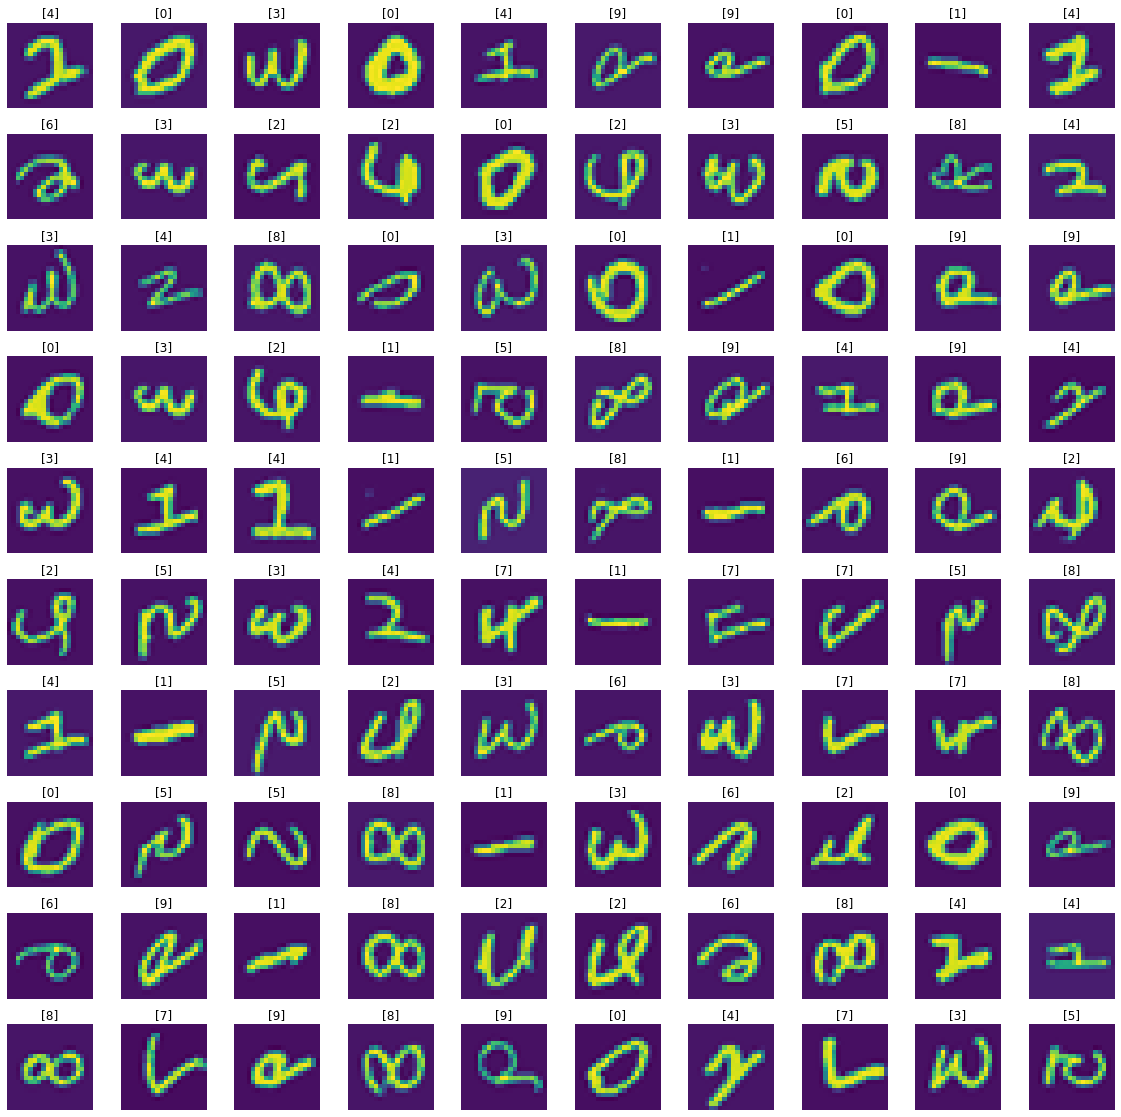

In [10]:
rows = 10
cols=10
fig, axes = plt.subplots(rows,cols, figsize=(20,20))
axes = axes.ravel()
training_data = len(images)
for i in np.arange(0,rows*cols):
    index = np.random.randint(0, training_data)
    axes[i].imshow(images[index].reshape(20,20))
    axes[i].axis('off')
    axes[i].set_title(labels[index]);
plt.subplots_adjust(hspace=0.3)

In [11]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [12]:
def Neural_Network(theta1, theta2, X):
    """
    Predict the label of an input given a trained neural network
    """
    m= X.shape[0]
    X = np.hstack((np.ones((m,1)),X))
    
    a1 = sigmoid(np.dot(X,theta1.T))
    a1 = np.hstack((np.ones((m,1)), a1)) # hidden layer == 1
    a2 = sigmoid(np.dot(a1,theta2.T)) # output layer
    
    return np.argmax(a2,axis=1)+1

In [13]:
predictions = Neural_Network(theta1,theta2,images).reshape(-1,1)

In [14]:
predictions[predictions==10] = 0

In [15]:
np.mean(predictions==labels)

0.9752